### The Basics

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In NumPy dimensions are called axes.

For example, the coordinates of a point in 3D space [1, 2, 1] has one axis. That axis has 3 elements in it, so we say it has a length of 3. In the example pictured below, the array has 2 axes. The first axis has a length of 2, the second axis has a length of 3.

NumPy’s array class is called ndarray. It is also known by the alias array. Note that numpy.array is not the same as the Standard Python Library class array.array, which only handles one-dimensional arrays and offers less functionality. The more important attributes of an ndarray object are:

#### ndarray.ndim

the number of axes (dimensions) of the array.

#### ndarray.shape

the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the number of axes, ndim.

#### ndarray.size

the total number of elements of the array. This is equal to the product of the elements of shape.

#### ndarray.dtype

an object describing the type of the elements in the array. One can create or specify dtype’s using standard Python types. Additionally NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples.

#### ndarray.itemsize

the size in bytes of each element of the array. For example, an array of elements of type float64 has itemsize 8 (=64/8), while one of type complex32 has itemsize 4 (=32/8). It is equivalent to ndarray.dtype.itemsize.

#### ndarray.data

the buffer containing the actual elements of the array. Normally, we won’t need to use this attribute because we will access the elements in an array using indexing facilities.

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
b = np.array([6, 7, 8])
a = np.arange(15).reshape(3, 5)
print(a.shape,"Shape of 'a' array\n")
print(a.ndim,"Dimension of an array\n")
print(a.dtype.name,"Data type\n ")
print(a.itemsize,"Find the iteamsize in array\n ")
print(a.size,"size oF an array\n")
print(type(a))
print(type(b),b)

(3, 5) Shape of 'a' array

2 Dimension of an array

int32 Data type
 
4 Find the iteamsize in array
 
15 size oF an array

<class 'numpy.ndarray'>
<class 'numpy.ndarray'> [6 7 8]


### Array Creation
There are several ways to create arrays.

For example, you can create an array from a regular Python list or tuple using the array function. The type of the resulting array is deduced from the type of the elements in the sequences.

In [56]:
import numpy as np
a = np.array([2,3,4])
print(a.dtype)
b = np.array([1.2, 3.5, 5.1])
print(b.dtype)

int32
float64


A frequent error consists in calling array with multiple numeric arguments, rather than providing a single list of numbers as an argument.

In [57]:
#a = np.array(1,2,3,4)    # WRONG
a = np.array([1,2,3,4])  # RIGHT

array transforms sequences of sequences into two-dimensional arrays, sequences of sequences of sequences into three-dimensional arrays, and so on.

In [58]:
b = np.array([(1.5,2,3), (4,5,6)])
b.size
b.shape

(2, 3)

The type of the array can also be explicitly specified at creation time:

In [59]:
c = np.array( [ [1,2], [3,4] ], dtype=complex )
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Often, the elements of an array are originally unknown, but its size is known. Hence, NumPy offers several functions to create arrays with initial placeholder content. These minimize the necessity of growing arrays, an expensive operation.

The function zeros creates an array full of zeros, the function ones creates an array full of ones, and the function empty creates an array whose initial content is random and depends on the state of the memory. By default, the dtype of the created array is float64.

In [60]:
x = np.zeros((3,4))
x

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [61]:
x = np.ones( (2,3,4), dtype=np.int16 )
x

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [62]:
d = np.empty( (2,3) )
d

array([[ 0.,  5., 10.],
       [15., 20., 25.]])

In [63]:
e = np.arange( 10, 30, 5 )
print(e)
f = np.arange( 0, 2, 0.3 ) 
print(f)

[10 15 20 25]
[0.  0.3 0.6 0.9 1.2 1.5 1.8]


In [64]:
from numpy import pi
g = np.linspace( 0, 2, 9) 
print(g)

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


In [65]:
xy = np.linspace( 0, 2*pi, 10) 
print(xy,"xy Variable has linspace is\n")
f = np.sin(xy)
print(xy,"linspace with pi\n",f,"sin on xy")

[0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361 6.28318531] xy Variable has linspace is

[0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361 6.28318531] linspace with pi
 [ 0.00000000e+00  6.42787610e-01  9.84807753e-01  8.66025404e-01
  3.42020143e-01 -3.42020143e-01 -8.66025404e-01 -9.84807753e-01
 -6.42787610e-01 -2.44929360e-16] sin on xy


### Printing Arrays
When you print an array, NumPy displays it in a similar way to nested lists, but with the following layout:

the last axis is printed from left to right,
the second-to-last is printed from top to bottom,
the rest are also printed from top to bottom, with each slice separated from the next by an empty line.
One-dimensional arrays are then printed as rows, bidimensionals as matrices and tridimensionals as lists of matrices.

In [66]:
a = np.arange(6)                         # 1d array
print(a,'1d array\n')

b = np.arange(12).reshape(4,3)           # 2d array
print(b,"2d array\n")

c = np.arange(24).reshape(2,3,4)         # 3d array
print(c,"3d array\n")

[0 1 2 3 4 5] 1d array

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] 2d array

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]] 3d array



If an array is too large to be printed, NumPy automatically skips the central part of the array and only prints the corners:

In [67]:
print(np.arange(10000),"\nPrinting all range of values from 0 to 10000")


[   0    1    2 ... 9997 9998 9999] 
Printing all range of values from 0 to 10000


In [68]:
print(np.arange(10000).reshape(100,100),"\nPrinting all range of values from 0 to 10000")

[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]] 
Printing all range of values from 0 to 10000


In [69]:
d = np.diag(np.array([1, 2, 3, 4]))
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [70]:
a = np.random.seed(1) # Setting the random seed

To disable this behaviour and force NumPy to print the entire array, you can change the printing options using set_printoptions.

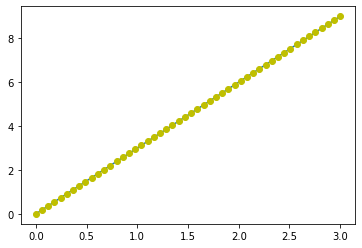

In [71]:
x = np.linspace(0, 3,50)
y = np.linspace(0, 9, 50)
plt.plot(x, y) # line plot
plt.plot(x,y ,'oy') # dot plot
plt.show()

In [72]:
image = np.random.randn(30,30)
image

array([[ 1.62434536e+00, -6.11756414e-01, -5.28171752e-01,
        -1.07296862e+00,  8.65407629e-01, -2.30153870e+00,
         1.74481176e+00, -7.61206901e-01,  3.19039096e-01,
        -2.49370375e-01,  1.46210794e+00, -2.06014071e+00,
        -3.22417204e-01, -3.84054355e-01,  1.13376944e+00,
        -1.09989127e+00, -1.72428208e-01, -8.77858418e-01,
         4.22137467e-02,  5.82815214e-01, -1.10061918e+00,
         1.14472371e+00,  9.01590721e-01,  5.02494339e-01,
         9.00855949e-01, -6.83727859e-01, -1.22890226e-01,
        -9.35769434e-01, -2.67888080e-01,  5.30355467e-01],
       [-6.91660752e-01, -3.96753527e-01, -6.87172700e-01,
        -8.45205641e-01, -6.71246131e-01, -1.26645989e-02,
        -1.11731035e+00,  2.34415698e-01,  1.65980218e+00,
         7.42044161e-01, -1.91835552e-01, -8.87628964e-01,
        -7.47158294e-01,  1.69245460e+00,  5.08077548e-02,
        -6.36995647e-01,  1.90915485e-01,  2.10025514e+00,
         1.20158952e-01,  6.17203110e-01,  3.00170320e-

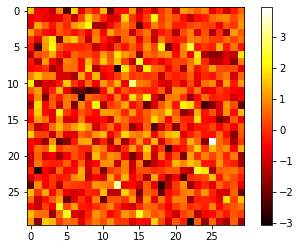

In [73]:
plt.imshow(image, cmap=plt.cm.hot)
plt.colorbar()

In [74]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [75]:
a[0], a[2], a[-1],a[1:5]

(0, 2, 9, array([1, 2, 3, 4]))

In [76]:
 a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [77]:
a = np.diag(np.arange(1,4))
a

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [78]:
a[1, 1]

2

In [79]:
a

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [80]:
a[2, 1] = 10 # third line, second column
a

array([[ 1,  0,  0],
       [ 0,  2,  0],
       [ 0, 10,  3]])

In [81]:
x = np.array([[1, 1], [3, 2]])
x

array([[1, 1],
       [3, 2]])

In [82]:
x.sum(axis=1)

array([2, 5])

In [83]:
x.sum(axis=0)

array([4, 3])

In [84]:
x

array([[1, 1],
       [3, 2]])

In [85]:
np.add(x,x)

array([[2, 2],
       [6, 4]])

### Basic Operations
Arithmetic operators on arrays apply elementwise. A new array is created and filled with the result.

In [86]:
aa = np.array( [20,30,40,50] )
bc = np.arange( 4 )
#print(aa,bc)
print(aa-bc,"Sub of Two arrays\n")
print(np.subtract(aa,bc),"Sub of Two arrays\n")
print(np.add(aa,bc),"Addation of two arrays\n")
print(aa+bc,"\n")
print(np.multiply(aa,bc),"Mul of two arrays\n")
print(aa*bc,"\n")

[20 29 38 47] Sub of Two arrays

[20 29 38 47] Sub of Two arrays

[20 31 42 53] Addation of two arrays

[20 31 42 53] 

[  0  30  80 150] Mul of two arrays

[  0  30  80 150] 



In [87]:
print(np.divide(aa,bc),"aa number divide with bc numbers")
print(aa/bc,"div\n")

[        inf 30.         20.         16.66666667] aa number divide with bc numbers
[        inf 30.         20.         16.66666667] div



c:\users\kumar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
c:\users\kumar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [88]:
print(np.divmod(aa,bc),"Divmode")

(array([ 0, 30, 20, 16], dtype=int32), array([0, 0, 0, 2], dtype=int32)) Divmode


c:\users\kumar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divmod
  """Entry point for launching an IPython kernel.


In [89]:
bc**2

array([0, 1, 4, 9], dtype=int32)

In [90]:
10*np.sin(aa)

array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

In [92]:
print(aa<35,"Lessthen Comp")
print(aa>35,"Greater Comp")
print(aa==bc,"Equal comp\n")

[ True  True False False] Lessthen Comp
[False False  True  True] Greater Comp
[False False False False] Equal comp



Unlike in many matrix languages, the product operator * operates elementwise in NumPy arrays. The matrix product can be performed using the @ operator (in python >=3.5) or the dot function or method:

In [40]:
A = np.array( [[1,1],[0,1]] )
B = np.array( [[2,0],[3,4]] )
print(A * B ,"# elementwise product\n")
print(A @ B ,"# matrix product\n")
print(A.dot(B),"# dot matrix product")

[[2 0]
 [0 4]] # elementwise product

[[5 4]
 [3 4]] # matrix product

[[5 4]
 [3 4]] # dot matrix product


Some operations, such as += and *=, act in place to modify an existing array rather than create a new one.

In [41]:
a = np.ones((2,3), dtype=int)
b = np.random.random((2,3))
a *= 3
b += a
print("Assignement operaters Mul\n",a)
print("Assignement operaters ADD\n",b)

Assignement operaters Mul
 [[3 3 3]
 [3 3 3]]
Assignement operaters ADD
 [[3.80930517 3.28296286 3.27338179]
 [3.38573719 3.42160812 3.93216543]]


When operating with arrays of different types, the type of the resulting array corresponds to the more general or precise one (a behavior known as upcasting).

In [42]:
a = np.ones(3, dtype=np.int32)
b = np.linspace(0,pi,3)
c =a+b
print(b.dtype.name,"Data type\n")
print("Add of two arrays\n",c)
c

float64 Data type

Add of two arrays
 [1.         2.57079633 4.14159265]


array([1.        , 2.57079633, 4.14159265])

Many unary operations, such as computing the sum of all the elements in the array, are implemented as methods of the ndarray class.

In [93]:
a = np.random.random((2,3))
print(a.sum(),"Sum of number")
print(a.min(),"Find the min")
print(a.max(),"Max of from array")

4.0497508966259455 Sum of number
0.07194722016400112 Find the min
0.9710833196254638 Max of from array


By default, these operations apply to the array as though it were a list of numbers, regardless of its shape. However, by specifying the axis parameter you can apply an operation along the specified axis of an array:

In [94]:
b = np.arange(12).reshape(3,4)
print(b)
print(b.sum(axis=0) ,"# sum of each column")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[12 15 18 21] # sum of each column


In [45]:
print(b.min(axis=0) ,"# min of each row")

[0 1 2 3] # min of each row


In [46]:
print(b)
print(b.cumsum(axis=1),"# cumulative sum along each row")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  3  6]
 [ 4  9 15 22]
 [ 8 17 27 38]] # cumulative sum along each row


In [95]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [97]:
b.cumsum(axis=0)

array([[ 0,  1,  2,  3],
       [ 4,  6,  8, 10],
       [12, 15, 18, 21]], dtype=int32)

In [48]:
b.cumprod(axis =1)

array([[   0,    0,    0,    0],
       [   4,   20,  120,  840],
       [   8,   72,  720, 7920]], dtype=int32)

###  Universal Functions
NumPy provides familiar mathematical functions such as sin, cos, and exp. In NumPy, these are called “universal functions”(ufunc). Within NumPy, these functions operate elementwise on an array, producing an array as output.
* all, 
* any, 
* apply_along_axis, 
* argmax, 
* argmin, 
* argsort, 
* average, 
* bincount, 
* ceil, 
* clip, 
* conj, 
* corrcoef, 
* cov, 
* cross, 
* cumprod, 
* cumsum, 
* diff, 
* dot, 
* floor, 
* inner, 
* inv, 
* lexsort, 
* max, 
* maximum, 
* mean, 
* median, 
* min, 
* minimum, 
* nonzero, 
* outer, 
* prod, 
* re, 
* round, 
* sort, 
* std, 
* sum, 
* trace, 
* transpose, 
* var, 
* vdot, 
* vectorize, 
* where

In [49]:
B = np.arange(3)
C = np.arange(3)
print(np.exp(B),"Exp of Array")
print(np.sqrt(B),"Square root of a array")
print(np.add(B, C),"Addition of Two Arrays")


[1.         2.71828183 7.3890561 ] Exp of Array
[0.         1.         1.41421356] Square root of a array
[0 2 4] Addition of Two Arrays


#### Numpy all and any 
Test whether all array elements along a given axis evaluate to True.

Test whether any array element along a given axis evaluates to True.

Returns single boolean unless axis is not None

In [50]:
# Test whether all array elements along a given axis evaluate to True.
print(np.all([[True,False],[True,True]]))
print(np.any([[True, False], [True, True]]))
np.any(np.nan)

False
True


True

#### numpy.apply_along_axis

Apply a function to 1-D slices along the given axis.

Execute func1d(a, *args) where func1d operates on 1-D arrays and a is a 1-D slice of arr along axis.

In [51]:
b = np.array([[1,2,3],[7,8,9], [4,5,6]])
b

array([[1, 2, 3],
       [7, 8, 9],
       [4, 5, 6]])

In [52]:
np.apply_along_axis(np.diag,  1, b)

array([[[1, 0, 0],
        [0, 2, 0],
        [0, 0, 3]],

       [[7, 0, 0],
        [0, 8, 0],
        [0, 0, 9]],

       [[4, 0, 0],
        [0, 5, 0],
        [0, 0, 6]]])

####  argmax, argmin, argsort,
Returns the indices of the maximum values along an axis.

Returns the indices of the minimum values along an axis.

Returns the indices that would sort an array.

Perform an indirect sort along the given axis using the algorithm specified by the kind keyword. It returns an array of indices of the same shape as a that index data along the given axis in sorted order.

In [53]:
a = np.arange(6).reshape(2,3) + 10
print(a, "Print all a array  values\n")
print("Index of 'max of a' values:  ",np.argmax(a) )
print("Index of 'max of a' values with axis zero:  ",np.argmax(a, axis=0))
print("Index of 'max of a' values with axis one:  ",np.argmax(a, axis=1))
# axis 2 is out of bounds for array of dimension 2
#print("Index of 'max of a' values with axis zero:  ",np.argmax(a, axis=2))

[[10 11 12]
 [13 14 15]] Print all a array  values

Index of 'max of a' values:   5
Index of 'max of a' values with axis zero:   [1 1 1]
Index of 'max of a' values with axis one:   [2 2]


In [54]:
a = np.arange(6).reshape(2,3) + 10
print("Index of 'min of a' values:  ",np.argmin(a) )
print("Index of 'min of a' values with axis zero:  ",np.argmin(a, axis=0))
print("Index of 'min of a' values with axis one:  ",np.argmin(a, axis=1))

Index of 'min of a' values:   0
Index of 'min of a' values with axis zero:   [0 0 0]
Index of 'min of a' values with axis one:   [0 0]


In [55]:
x = np.array([3, 1, 2])
print(np.argsort(x),"Arg Sorting of a number\n")
print(np.argsort(x, axis=0) ,"# sorts along first axis (down)\n")
x = np.array([[0, 3], [2, 2]])
print(np.argsort(x, axis=1) ,"# sorts along last axis (across)\n")

[1 2 0] Arg Sorting of a number

[1 2 0] # sorts along first axis (down)

[[0 1]
 [0 1]] # sorts along last axis (across)



### Average

Compute the weighted average along the specified axis.

In [56]:
data = range(1,5)
print(np.average(data))

c =np.average(range(1,11), weights=range(10,0,-1))
print(c)

2.5
4.0


### bincount

Count number of occurrences of each value in array of non-negative ints.

The number of bins (of size 1) is one larger than the largest value in x. If minlength is specified, there will be at least this number of bins in the output array (though it will be longer if necessary, depending on the contents of x). Each bin gives the number of occurrences of its index value in x. If weights is specified the input array is weighted by it, i.e. if a value n is found at position i, out[n] += weight[i] instead of out[n] += 1.

In [57]:
a = np.bincount(np.arange(1,10))
b = np.bincount(np.array([0, 1, 1, 3, 2, 1, 7]))
print(a,"\n","\n",b)

[0 1 1 1 1 1 1 1 1 1] 
 
 [1 3 1 1 0 0 0 1]


#### Ceil
Return the ceiling of the input, element-wise.

The ceil of the scalar x is the smallest integer i, such that i >= x. It is often denoted as \lceil x \rceil.

In [58]:
a = np.array([-1.7, -1.5, -0.2, 0.2, 1.5, 1.7, 2.0])
print(np.ceil(a))

[-1. -1. -0.  1.  2.  2.  2.]


#### Clip
Clip (limit) the values in an array.

Given an interval, values outside the interval are clipped to the interval edges. For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.

In [59]:
a = np.arange(10)
np.clip(a, 2, 8)

array([2, 2, 2, 3, 4, 5, 6, 7, 8, 8])

In [60]:
np.clip(a,3,6)

array([3, 3, 3, 3, 4, 5, 6, 6, 6, 6])

#### numpy.conj
Return the complex conjugate, element-wise.

The complex conjugate of a complex number is obtained by changing the sign of its imaginary part.

In [61]:
np.conjugate(1+2j)

(1-2j)

In [62]:
x = np.eye(2) - 1j * np.eye(2)
np.conjugate(x)

array([[1.+1.j, 0.-0.j],
       [0.-0.j, 1.+1.j]])

#### correlation coefficients
Return Pearson product-moment correlation coefficients.

Please refer to the documentation for cov for more detail. The relationship between the correlation coefficient matrix, R, and the covariance matrix, C, is

In [63]:
x = np.random.randn(20)
y = np.random.randn(20)
np.corrcoef(x,y)

array([[1.       , 0.0552433],
       [0.0552433, 1.       ]])

#### Cross Product
Return the cross product of two (arrays of) vectors.

The cross product of a and b in R^3 is a vector perpendicular to both a and b. If a and b are arrays of vectors, the vectors are defined by the last axis of a and b by default, and these axes can have dimensions 2 or 3. Where the dimension of either a or b is 2, the third component of the input vector is assumed to be zero and the cross product calculated accordingly. In cases where both input vectors have dimension 2, the z-component of the cross product is returned.



![](https://lh3.googleusercontent.com/-Yq_ECfwczFU/XTfHHRAIYwI/AAAAAAAAgF4/jJ4qyYM_MpUbEwSmJOJhApQLEZyyDmBmwCK8BGAs/s0/Cross%2BProduct.PNG)

In [64]:
import numpy as np
x = [2, 3, 4]
y = [5, 6, 7]
np.cross(x, y)

array([-3,  6, -3])

In [65]:
x = np.array([[1,2,3], [4,5,6]])
y = np.array([[4,5,6], [1,2,3]])
np.cross(x, y)

array([[-3,  6, -3],
       [ 3, -6,  3]])

In [66]:
x = [2,1]
y = [2,4]
np.cross(x, y)
# a*(b+c)=a*b+a*c

array(6)

#### cumulative product 
Return the cumulative product of elements along a given axis.

In [67]:
a = np.array([1,2,3])
np.cumprod(a)

array([1, 2, 6], dtype=int32)

In [68]:
a = np.array([[1, 2, 3], [4, 5, 6]])
np.cumprod(a, dtype=float)

array([  1.,   2.,   6.,  24., 120., 720.])

#### numpy.cumsum
Return the cumulative sum of the elements along a given axis.

In [69]:
a = np.array([[1,2,3], [4,5,6]])
np.cumsum(a)

array([ 1,  3,  6, 10, 15, 21], dtype=int32)

In [70]:
np.cumsum(a)

array([ 1,  3,  6, 10, 15, 21], dtype=int32)

In [71]:
np.cumsum(a,axis=0) 

array([[1, 2, 3],
       [5, 7, 9]], dtype=int32)

##### numpy.diff
numpy.diff(a, n=1, axis=-1, prepend=<no value>, append=<no value>)
    
Calculate the n-th discrete difference along the given axis.

The first difference is given by out[n] = a[n+1] - a[n] along the given axis, higher differences are calculated by using diff recursively.



In [72]:
u8_arr = np.array([1, 0], dtype=np.uint8)
np.diff(u8_arr)

array([255], dtype=uint8)

In [73]:
x = np.array([1, 2, 4, 7, 0])
np.diff(x)

array([ 1,  2,  3, -7])

In [75]:
y = np.array([1,2,3,5,7])
np.diff(y)

array([1, 1, 2, 2])

#### Dot product
Dot product of two arrays. Specifically,

If both a and b are 1-D arrays, it is inner product of vectors (without complex conjugation).

If both a and b are 2-D arrays, it is matrix multiplication, but using matmul or a @ b is preferred.

If either a or b is 0-D (scalar), it is equivalent to multiply and using numpy.multiply(a, b) or a * b is preferred.

If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b.

If a is an N-D array and b is an M-D array (where M>=2), it is a sum product over the last axis of a and the second-to-last axis of b:

In [76]:
np.dot(3, 4)

12

In [74]:
a = [[1, 0], [0, 1]]
b = [[4, 1], [2, 2]]
np.dot(a,b)

array([[4, 1],
       [2, 2]])

#### numpy.floor
Return the floor of the input, element-wise.

The floor of the scalar x is the largest integer i, such that i <= x. It is often denoted as \lfloor x \rfloor.

In [75]:
a = np.array([-1.7, -1.5, -0.2, 0.2, 1.5, 1.7, 2.0])
np.floor(a)

array([-2., -2., -1.,  0.,  1.,  1.,  2.])

#### numpy.inner
Inner product of two arrays.

Ordinary inner product of vectors for 1-D arrays (without complex conjugation), in higher dimensions a sum product over the last axes.

In [76]:
a = np.array([1,2,3])
b = np.array([0,1,0])
np.inner(a, b)

2

In [77]:
a =np.array([[1,2,3],[1,2,3]])
b = np.array([[1,2,3],[1,2,3]])
#c = np.array([[1,2,3],[1,2,3]])
np.inner(a,b)

array([[14, 14],
       [14, 14]])

In [78]:
a = np.arange(24).reshape((2,3,4))
b = np.arange(4)
np.inner(a, b)

array([[ 14,  38,  62],
       [ 86, 110, 134]])

In [79]:
#### numpy.lexsort
a = [1,5,1,4,3,4,4] # First column
b = [9,4,0,4,0,2,1] # Second column
ind = np.lexsort((a,b)) # Sort by a, then by b
ind

array([2, 4, 6, 5, 3, 1, 0], dtype=int64)

In [80]:
a =[1,2,4]
b = [3,2,5]
np.lexsort((a,b))

array([1, 0, 2], dtype=int64)

In [81]:
import numpy as np
np.lexsort?

#### numpy.maximum
Element-wise maximum of array elements.

Compare two arrays and returns a new array containing the element-wise maxima. If one of the elements being compared is a NaN, then that element is returned. If both elements are NaNs then the first is returned. The latter distinction is important for complex NaNs, which are defined as at least one of the real or imaginary parts being a NaN. The net effect is that NaNs are propagated.

In [84]:
np.maximum([2, 3, 4], [1, 5, 2])

array([2, 5, 4])

In [85]:
np.maximum(np.eye(2), [0.5, 2]) # broadcasting

array([[1. , 2. ],
       [0.5, 2. ]])

In [88]:
np.minimum(np.eye(2),[2,2])

array([[1., 0.],
       [0., 1.]])

#### numpy.mean
Compute the arithmetic mean along the specified axis.


Returns the average of the array elements. The average is taken over the flattened array by default, otherwise over the specified axis. float64 intermediate and return values are used for integer inputs.

![](https://lh3.googleusercontent.com/-tVF0JnkvYTc/XThg_LQF7NI/AAAAAAAAgGU/nvc8QA5CvnwuCXMY8yASxXV8h1sYSK6YQCK8BGAs/s0/Mean.PNG)

In [77]:
a = np.array([[1, 2], [3, 4]])
np.mean(a)

2.5

In [78]:
np.mean(a,axis=1)

array([1.5, 3.5])

In [112]:
np.mean(a,axis=0)

array([2., 3.])

#### numpy.median
Compute the median along the specified axis.

Returns the median of the array elements.
![](https://lh3.googleusercontent.com/-pTXTvJYH3wo/XThhnhBOkxI/AAAAAAAAgGg/OqIUQoMbTcEPXPcOmVEpDrfVcF-bbDzdACK8BGAs/s220/2019-07-24.png)

In [80]:
x = np.array([1,3,3,6,7,8,9])
np.median(x)

6.0

In [90]:
a = np.array([[10, 7, 4], [3, 2, 1]])
print(a)
np.median(a)

[[10  7  4]
 [ 3  2  1]]


3.5

In [59]:
np.median(a, axis=0)

array([6.5, 4.5, 2.5])

In [61]:
np.median(a, axis=1)

array([7., 2.])

#### numpy.minimum

Element-wise minimum of array elements.

Compare two arrays and returns a new array containing the element-wise minima. If one of the elements being compared is a NaN, then that element is returned. If both elements are NaNs then the first is returned. The latter distinction is important for complex NaNs, which are defined as at least one of the real or imaginary parts being a NaN. The net effect is that NaNs are propagated.

In [113]:
np.minimum([2, 3, 4], [1, 5, 2])

array([1, 3, 2])

In [65]:
np.minimum(np.eye(2), [0.5, 2])

array([[0.5, 0. ],
       [0. , 1. ]])

#### numpy.nonzero
Return the indices of the elements that are non-zero.

Returns a tuple of arrays, one for each dimension of a, containing the indices of the non-zero elements in that dimension. The values in a are always tested and returned in row-major, C-style order. The corresponding non-zero values can be obtained with:

In [94]:
x = np.array([[3, 0, 0], [0, 4, 0], [5, 0, 0]])
np.nonzero(x)

(array([0, 1, 2], dtype=int64), array([0, 1, 0], dtype=int64))

##### numpy.outer

Compute the outer product of two vectors.

Given two vectors, a = [a0, a1, ..., aM] and b = [b0, b1, ..., bN], the outer product [1] is:

In [83]:
rl = np.outer(np.ones((5,)), np.linspace(-2, 2, 5))
rl

array([[-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.],
       [-2., -1.,  0.,  1.,  2.]])

#### numpy.prod

Return the product of array elements over a given axis.

In [84]:
x = np.array([1, 2, 3], dtype=np.uint8)
np.prod(x)

6

#### sort
Return a sorted copy of an array.

In [97]:
>>> a = np.array([[1,4,2],[3,1,6]])
>>> np.sort(a)   

array([[1, 2, 4],
       [1, 3, 6]])

#### standard deviation
Compute the standard deviation along the specified axis.

Returns the standard deviation, a measure of the spread of a distribution, of the array elements. The standard deviation is computed for the flattened array by default, otherwise over the specified axis.
![](https://lh3.googleusercontent.com/-neXTsbjg7FM/XThjTzcexXI/AAAAAAAAgG4/wsS_wdIc4KATvbddmkpu_PvepL-8U61PwCK8BGAs/s0/Std.PNG)

In [86]:
a = np.array([[1, 3], [4, 5]])
print(a)
np.std(a)

[[1 3]
 [4 5]]


1.479019945774904

In [87]:
np.std(a, axis=0)

array([1.5, 1. ])

In [88]:
np.std(a,axis=1)

array([1. , 0.5])

#### numpy.sum
Sum of array elements over a given axis.

In [89]:
np.sum([0.5, 1.5])

2.0

#### numpy.trace

Return the sum along diagonals of the array.

If a is 2-D, the sum along its diagonal with the given offset is returned, i.e., the sum of elements a[i,i+offset] for all i.

If a has more than two dimensions, then the axes specified by axis1 and axis2 are used to determine the 2-D sub-arrays whose traces are returned. The shape of the resulting array is the same as that of a with axis1 and axis2 removed.

In [90]:
np.trace(np.eye(4))

4.0

#### numpy.transpose

Permute the dimensions of an array.

In [91]:
x = np.arange(1,5).reshape((2,2))
x

array([[1, 2],
       [3, 4]])

In [92]:
np.transpose(x)

array([[1, 3],
       [2, 4]])

In [93]:
x.T

array([[1, 3],
       [2, 4]])

#### numpy.var

Compute the variance along the specified axis.

Returns the variance of the array elements, a measure of the spread of a distribution. The variance is computed for the flattened array by default, otherwise over the specified axis.

In [95]:
a = np.array([[1, 2], [3, 4]])
print(np.var(a),"\n")

1.25 



In [97]:
print(np.var(a, axis=0),"\n")

print(np.var(a, axis=1),"\n")

[1. 1.] 

[0.25 0.25] 



#### numpy.vdot(a, b)
Return the dot product of two vectors.

The vdot(a, b) function handles complex numbers differently than dot(a, b). If the first argument is complex the complex conjugate of the first argument is used for the calculation of the dot product.

Note that vdot handles multidimensional arrays differently than dot: it does not perform a matrix product, but flattens input arguments to 1-D vectors first. Consequently, it should only be used for vectors.

In [100]:
a = np.array([1+2j,3+4j])
b = np.array([5+6j,7+8j])
print(a.ndim)
print(b)
np.vdot(a, b)

1
[5.+6.j 7.+8.j]


(70-8j)

#### numpy.vectorize

Generalized function class.

Define a vectorized function which takes a nested sequence of objects or numpy arrays as inputs and returns a single numpy array or a tuple of numpy arrays. The vectorized function evaluates pyfunc over successive tuples of the input arrays like the python map function, except it uses the broadcasting rules of numpy.

The data type of the output of vectorized is determined by calling the function with the first element of the input. This can be avoided by specifying the otypes argument.

In [105]:
def myfunc(a, b):
...     "Return a-b if a>b, otherwise return a+b"
...     if a > b:
...         return a - b
...     else:
...         return a + b

In [109]:
vfunc = np.vectorize(myfunc)
print(vfunc.__doc__)
vfunc([1, 2, 3, 4], 2)

Return a-b if a>b, otherwise return a+b


array([3, 4, 1, 2])

##### numpy.where
numpy.where(condition[, x, y])


Return elements chosen from x or y depending on condition.

In [112]:
a = np.arange(10)
np.where(a < 5, a, 10*a)

array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])